<img src="../fasp/runner/credits/images/GTEXExample.jpg" style="float: right;">

### GTEX Example - AWS compute via Seven Bridges WES
This notebook computes on the freely available GTEX version 8 files on Amazon AWS using the Seven Bridges Cancer Genomics Cloud WES service. 

In this case the DRS ids of the GTEX files are available via a client which acccess a local manifest file. The manifest file is obtained from Anvil as follows.
https://anvilproject.org/learn/reference/gtex-v8-free-egress-instructions

Rather than use the Gen3 Downloader described in the egress instructions, this example uses the Anvil DRS service to obtain URLs which can be passed to the Seven Bridges CGC WES Service.

The following step demonstrates a query run against that file. 

In [9]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.search import Gen3ManifestClient
from fasp.loc import anvilDRSClient
from fasp.workflow import sbcgcWESClient

faspRunner = FASPRunner()

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = Gen3ManifestClient('../fasp/data/gtex/gtex-cram-manifest.json')
res = searchClient.runQuery(3)


Running FASPNotebook18-GTEXExample-AWS.ipynb


In [10]:
drsClient = anvilDRSClient('~/.keys/anvil_credentials.json', access_id='s3')
drsClient.getObject(res[2][1])

{'access_methods': [{'access_id': 'gs',
   'access_url': {'url': 'gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_WGS_CRAM_files/GTEX-1B98T-0004-SM-7J38T.cram'},
   'region': '',
   'type': 'gs'},
  {'access_id': 's3',
   'access_url': {'url': 's3://AnVIL/GTEx_Analysis_2017-06-05_v8_WGS_CRAM_files/GTEX-1B98T-0004-SM-7J38T.cram'},
   'region': '',
   'type': 's3'}],
 'aliases': [],
 'checksums': [{'checksum': 'cfd2f4cde4aa3e0cf9f726f0c1255fcd',
   'type': 'md5'}],
 'contents': [],
 'created_time': '2020-07-08T18:53:27.860156',
 'description': None,
 'form': 'object',
 'id': 'dg.ANV0/ed9ac9ae-02da-4e97-93da-ad86aa77d227',
 'mime_type': 'application/json',
 'name': 'GTEX-1B98T-0004-SM-7J38T.cram',
 'self_uri': 'drs://gen3.theanvil.io/dg.ANV0/ed9ac9ae-02da-4e97-93da-ad86aa77d227',
 'size': 38379493977,
 'updated_time': '2020-07-08T18:53:27.860163',
 'version': '64acd5a6'}

In [11]:
url = drsClient.getAccessURL(res[2][1])

In [12]:
settings = faspRunner.settings
wesClient = sbcgcWESClient( settings['SevenBridgesProject'], '~/.keys/sbcgc_key.json')

faspRunner.configure(searchClient, drsClient, wesClient)

faspRunner.runQuery(3, 'Anvil GTEX Test from notebook')

Running query
3
subject=GTEX-1GTWX-0001-SM-7J3A5.cram, drsID=dg.ANV0/76bb893d-12da-41ca-8828-ff89551d3e15
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:ce9b48c4-6e62-48fb-8c59-23e34c7c471c
____________________________________________________________
subject=GTEX-14PQA-0003-SM-7DLH4.cram, drsID=dg.ANV0/66352de8-4b50-4cae-881d-b76d03df5ac8
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:020c7ec1-2c89-4840-99fd-387bb7dada49
____________________________________________________________
subject=GTEX-1B98T-0004-SM-7J38T.cram, drsID=dg.ANV0/ed9ac9ae-02da-4e97-93da-ad86aa77d227
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:47cdc1d6-826b-47d4-af25-5303857411e5
____________________________________________________________


[{'subject': 'GTEX-1GTWX-0001-SM-7J3A5.cram',
  'run_id': 'ce9b48c4-6e62-48fb-8c59-23e34c7c471c'},
 {'subject': 'GTEX-14PQA-0003-SM-7DLH4.cram',
  'run_id': '020c7ec1-2c89-4840-99fd-387bb7dada49'},
 {'subject': 'GTEX-1B98T-0004-SM-7J38T.cram',
  'run_id': '47cdc1d6-826b-47d4-af25-5303857411e5'}]

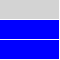

In [14]:
faspRunner.getFASPicon()